In [1]:
import sys

sys.path.append("../mcts_dl")

In [2]:
import numpy as np
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

In [3]:
from utils.utils import ReadMapFromMovingAIFile, Map

In [4]:
map_name = "Berlin_0_1024"
taskMap = ReadMapFromMovingAIFile(f"../data/{map_name}.map")

In [5]:
def Draw(gridMap : Map):
    k = 1
    hIm = gridMap.height * k
    wIm = gridMap.width * k
    im = Image.new('RGB', (wIm, hIm), color = 'white')
    draw = ImageDraw.Draw(im)
    for i in range(gridMap.height):
        for j in range(gridMap.width):
            if(gridMap.cells[i][j] == 1):
                draw.rectangle((j * k, i * k, (j + 1) * k - 1, (i + 1) * k - 1), fill=( 70, 80, 80 ))
    
    return np.asarray(im)

In [6]:
def get_image_map(gridMap : Map):
    hIm = gridMap.height 
    wIm = gridMap.width
    im = np.ones((hIm, wIm))
    for i in range(gridMap.height):
        for j in range(gridMap.width):
            if(gridMap.cells[i][j] == 1):
                im[i][j] = 0
    return np.asarray(im) * 255

In [7]:
image_map = get_image_map(taskMap)

In [9]:
image_map

array([[255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       ...,
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.]])

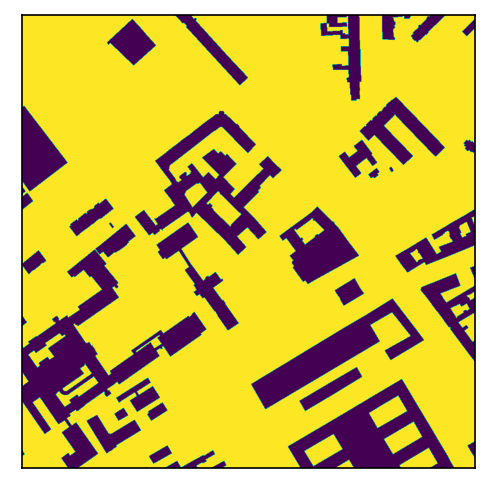

In [8]:
fig, ax = plt.subplots(dpi=150)
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
plt.imshow(image_map)

In [10]:
x, y = 330, 348

In [62]:
def draw_next_window(image_map, current, window_size=50):
    fig, axes = plt.subplots(3, 3, figsize=(12, 6), dpi=150)

    fig.suptitle('Windows')
    for i in [-1, 0, 1]:
        for j in [-1, 0, 1]:
            x = current[0] + i * 10
            y = current[1] + j * 10
            window = image_map[x-window_size:x+window_size+1, y-window_size:y+window_size+1]
            
            axes[i+1][j+1].imshow(window)
            axes[i+1][j+1].set_title(f"{i, j}")
            axes[i+1][j+1].axis('off')
    plt.show()

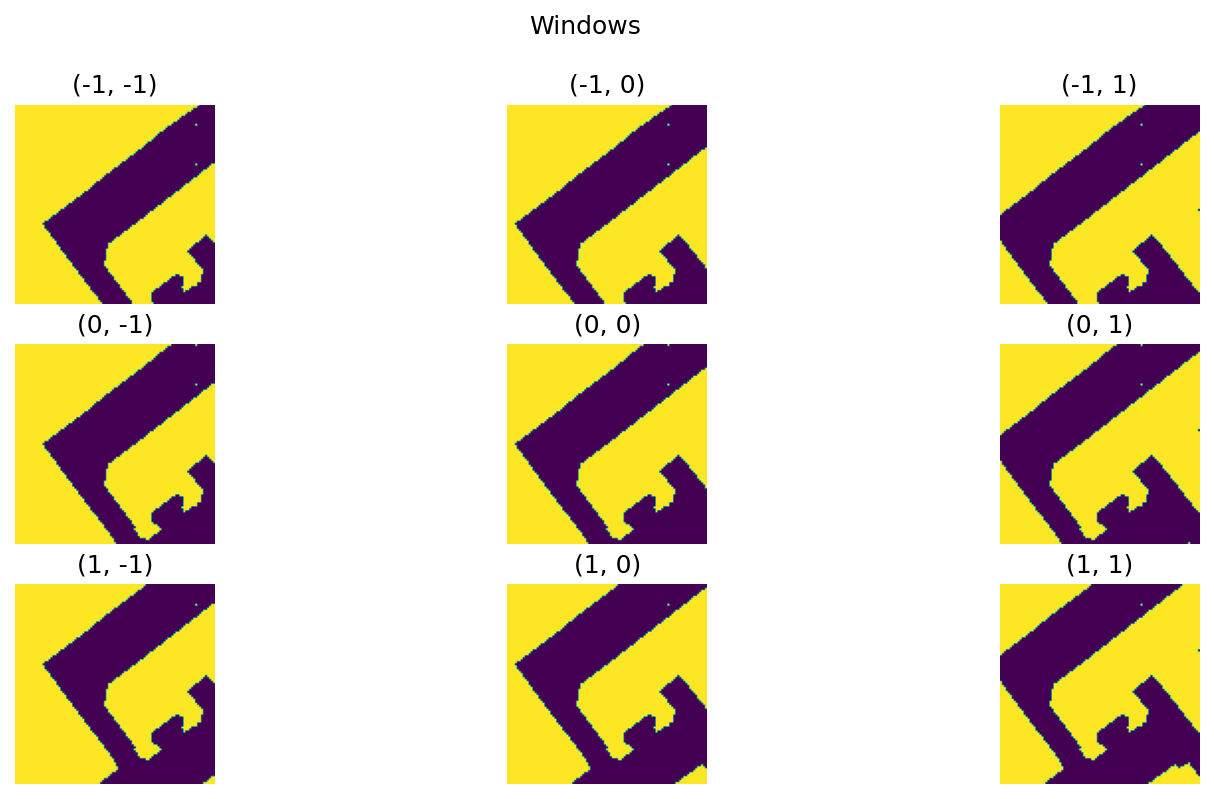

In [63]:
draw_next_window(image_map, (x, y))

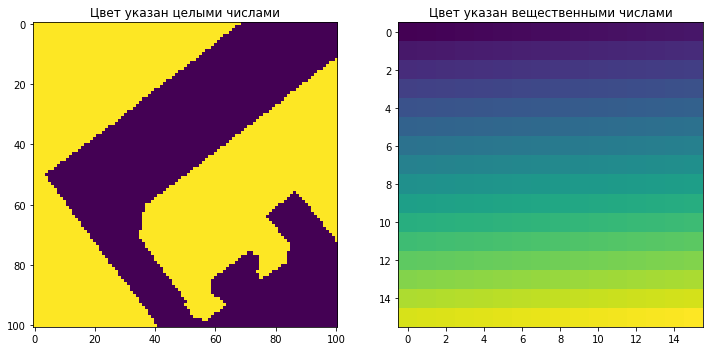

In [40]:

window_size = 50
im = image_map[x-window_size:x+window_size+1, y-window_size:y+window_size+1]


fig, axes = plt.subplots(4, 2)
axes[0].imshow(im)
axes[0].set_title('Цвет указан целыми числами')

axes[1].imshow(data_float)
axes[1].set_title('Цвет указан вещественными числами')

fig.set_figwidth(12)    #  ширина и
fig.set_figheight(6)    #  высота "Figure"

plt.show()

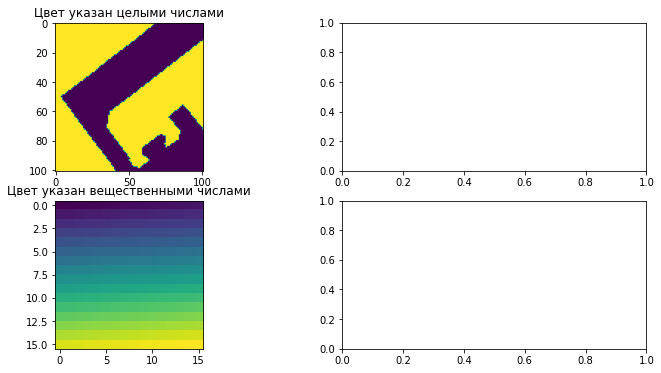

In [43]:
data_int = np.arange(0, 256).reshape(16, 16)
data_float = np.linspace(0, 1, 256).reshape(16, 16)
window_size = 50
im = image_map[x-window_size:x+window_size+1, y-window_size:y+window_size+1]


fig, axes = plt.subplots(2, 2)
axes[0][0].imshow(im)
axes[0][0].set_title('Цвет указан целыми числами')

axes[1][0].imshow(data_float)
axes[1][0].set_title('Цвет указан вещественными числами')

fig.set_figwidth(12)    #  ширина и
fig.set_figheight(6)    #  высота "Figure"

plt.show()